### Student Information
Name:顏嘉德

Student ID:104000011

GitHub ID:Tonyyemgithub

---

In [211]:
print ('目錄 \npart1 first lab using new data \npart2 new data visulization \npart3 (1)TFIDF(2)navie bayes \npart4 presentation matter \npart5 lab excercise')

目錄 
part1 first lab using new data 
part2 new data visulization 
part3 (1)TFIDF(2)navie bayes 
part4 presentation matter 
part5 lab excercise


### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [12]:
### Begin Assignment Here!
# necessary for when working with external scripts
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
print(os.getcwd())

C:\Users\USER\Desktop\dm_2018_hw_1-master\dm_2018_hw_1-master


In [15]:
files = [("amazon", os.path.join(".","amazon_cells_labelled.txt")),
         ("imdb", os.path.join(".","imdb_labelled.txt")), 
         ("yelp", os.path.join(".","yelp_labelled.txt"))]

In [16]:
dfs = []             
for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentance", "label"]
    df["provider"] = provider
    dfs.append(df)
    
A = pd.concat(dfs, axis=0)
print(A.head())

print("shape", A.shape)

                                            sentance  label provider
0                        Good case, Excellent value.      1   amazon
1                             Great for the jawbone.      1   amazon
2  Tied to charger for conversations lasting more...      0   amazon
3                                  The mic is great.      1   amazon
4  I have to jiggle the plug to get it to line up...      0   amazon
shape (2745, 3)


In [17]:
# using loc (by label)
A.loc[::10, ['sentance','provider']][0:30]

,sentance,provider
0,"Good case, Excellent value.",amazon
10,He was very impressed when going from the orig...,amazon
20,I bought this to use with my Kindle Fire and a...,amazon
30,This product is ideal for people like me whose...,amazon
40,I was not impressed by this product.,amazon
50,good protection and does not make phone too bu...,amazon
60,I really recommend this faceplates since it lo...,amazon
70,"Even in my BMW 3 series which is fairly quiet,...",amazon
80,Not a good bargain.,amazon
90,Made very sturdy.,amazon


In [18]:
A.iloc[998:999]

,sentance,label,provider
998,"You can not answer calls with the unit, never ...",0,amazon


In [19]:
A.iloc[999:1000]

,sentance,label,provider
0,Not sure who was more lost - the flat characte...,0,imdb


In [20]:
A.iloc[1000:1001]

,sentance,label,provider
1,Attempting artiness with black & white and cle...,0,imdb


In [21]:
# standard query (Cannot simultaneously select rows and columns)
A[::10][0:10]

,sentance,label,provider
0,"Good case, Excellent value.",1,amazon
10,He was very impressed when going from the orig...,1,amazon
20,I bought this to use with my Kindle Fire and a...,1,amazon
30,This product is ideal for people like me whose...,1,amazon
40,I was not impressed by this product.,0,amazon
50,good protection and does not make phone too bu...,1,amazon
60,I really recommend this faceplates since it lo...,1,amazon
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon
80,Not a good bargain.,0,amazon
90,Made very sturdy.,1,amazon


In [22]:
# Answer here
A.ix[::10,][:10]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,sentance,label,provider
0,"Good case, Excellent value.",1,amazon
10,He was very impressed when going from the orig...,1,amazon
20,I bought this to use with my Kindle Fire and a...,1,amazon
30,This product is ideal for people like me whose...,1,amazon
40,I was not impressed by this product.,0,amazon
50,good protection and does not make phone too bu...,1,amazon
60,I really recommend this faceplates since it lo...,1,amazon
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon
80,Not a good bargain.,0,amazon
90,Made very sturdy.,1,amazon


In [23]:
# Answer here
#找sci.med再category_name底下的
A[A['provider']=='amazon'].loc[::10, 'sentance'][0:5]

0                           Good case, Excellent value.
10    He was very impressed when going from the orig...
20    I bought this to use with my Kindle Fire and a...
30    This product is ideal for people like me whose...
40                 I was not impressed by this product.
Name: sentance, dtype: object

In [24]:
#找資料中有無 missing value
A.isnull()

,sentance,label,provider
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [26]:
import helpers.data_mining_helpers as dmh

In [27]:
A.isnull().apply(lambda A: dmh.check_missing_values(A))

sentance    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 0)
dtype: object

In [28]:
# Answer here
#apply(f, axis = 0) 將f函式應用到軸 0
A.isnull().apply(lambda A :dmh.check_missing_values(A), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [29]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [30]:
dummy_series

text        dummy_record
category               1
dtype: object

In [31]:
result_with_series = A.append(dummy_series, ignore_index=True)

In [32]:
# check if the records was commited into result
len(result_with_series)

2746

In [33]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentance       (The amoung of missing records is: , 1)
label          (The amoung of missing records is: , 1)
provider       (The amoung of missing records is: , 1)
category    (The amoung of missing records is: , 2745)
text        (The amoung of missing records is: , 2745)
dtype: object

In [36]:
#消除 missing value
A.dropna(inplace=True)

In [37]:
A.isnull().apply(lambda x: dmh.check_missing_values(x))

sentance    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 0)
dtype: object

In [38]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [39]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [40]:
A.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
Length: 2745, dtype: bool

In [41]:
sum(A.duplicated())

17

In [42]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [43]:
A = A.append(dummy_duplicate_dict, ignore_index=True)

In [44]:
sum(A.duplicated('text'))

2745

In [45]:
A.drop_duplicates(keep=False, inplace=True) 
# inplace applies changes directly on our dataframe

In [46]:
# Sampling
A_sample = A.sample(n=1000)  #random state

In [47]:
A_sample[0:4]

,category,category_name,label,provider,sentance,text
1339,NaN,NaN,0.0,imdb,i wouldnt see this movie again for free.,NaN
2690,NaN,NaN,0.0,yelp,The chipolte ranch dipping sause was tasteless...,NaN
1478,NaN,NaN,1.0,imdb,This is an excellent film.,NaN
20,NaN,NaN,1.0,amazon,I bought this to use with my Kindle Fire and a...,NaN


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

This allows the possibility of double booking for the same date and time after the first.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

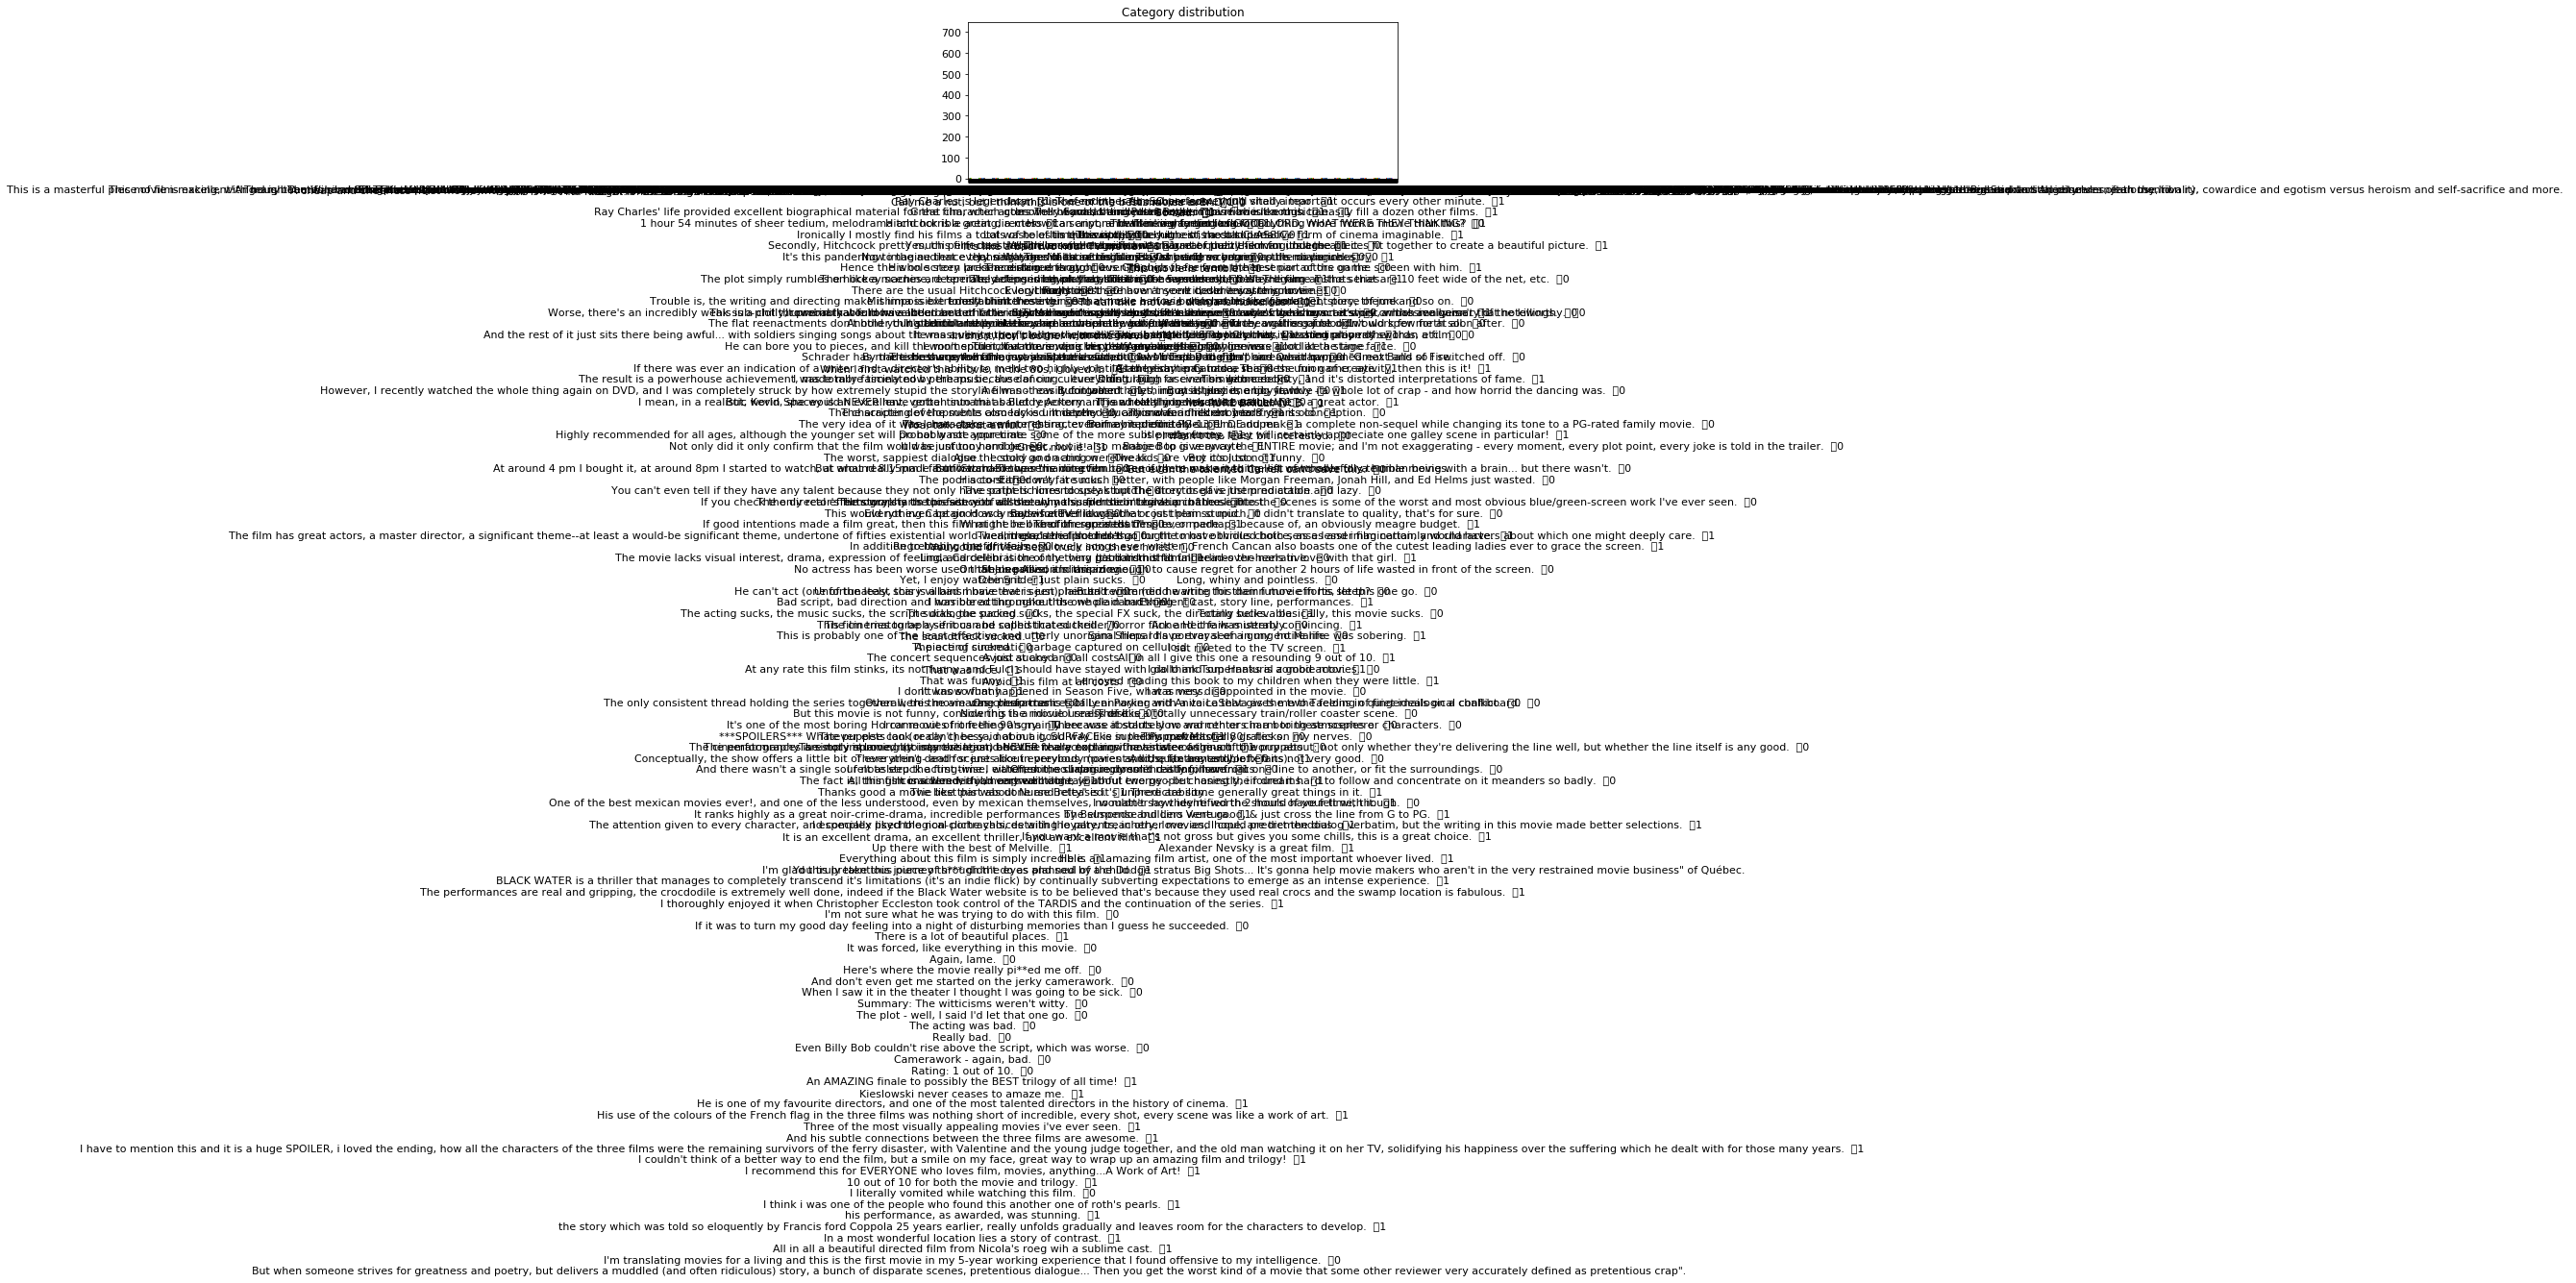

In [49]:
print(A.sentance.value_counts())

# plot barchart for X_sample
A.sentance.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 750],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# bar-條狀圖, fontsize-文字大小

yelp      401
amazon    338
imdb      261
Name: provider, dtype: int64


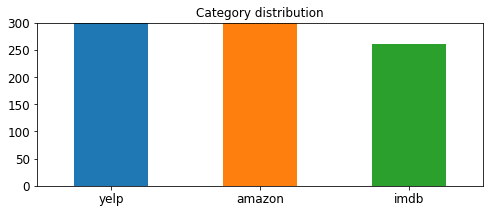

In [50]:
# Sample one
print(A_sample.provider.value_counts())

# plot barchart for X_sample
A_sample.provider.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

yelp      401
amazon    338
imdb      261
Name: provider, dtype: int64


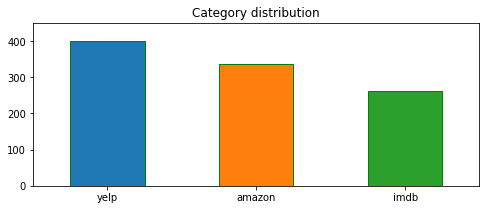

In [51]:
# Answer here
upperbond = max(A_sample.provider.value_counts())+50
print(A_sample.provider.value_counts())

# plot barchart for X_sample
A_sample.provider.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,upperbond],       
                                    ec = 'green',#描邊
                                    rot = 0, fontsize = 10, figsize = (8,3))

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
# takes a like a minute or two to process
A['unigrams'] = A['sentance'].apply(lambda x: dmh. tokenize_text(x))

In [54]:
A[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [55]:
list(A[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

In [156]:
# 把文字轉成矩陣
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
A_counts = count_vect.fit_transform(A.sentance)

In [157]:
A_counts

<2711x5149 sparse matrix of type '<class 'numpy.int64'>'
	with 30117 stored elements in Compressed Sparse Row format>

In [158]:
# We can check the shape of this matrix by:
A_counts.shape

(2711, 5149)

In [159]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [160]:
# we convert from sparse array to normal array
A_counts[0:5,0:50
        ].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
vectorizer = TfidfVectorizer()
A_number = vectorizer.fit_transform(A['sentance'])

In [163]:
# first twenty features only
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()[0:30]]

In [164]:
# obtain document index
Total = []
for i in range (30):
    Total.append(i)
plot_y = ["doc_"+ str(i) for i in Total]

In [165]:
plot_z = A_number[0:30, 0:30].toarray()

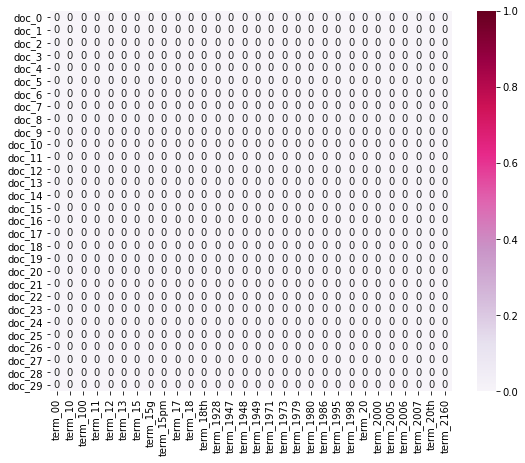

In [166]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

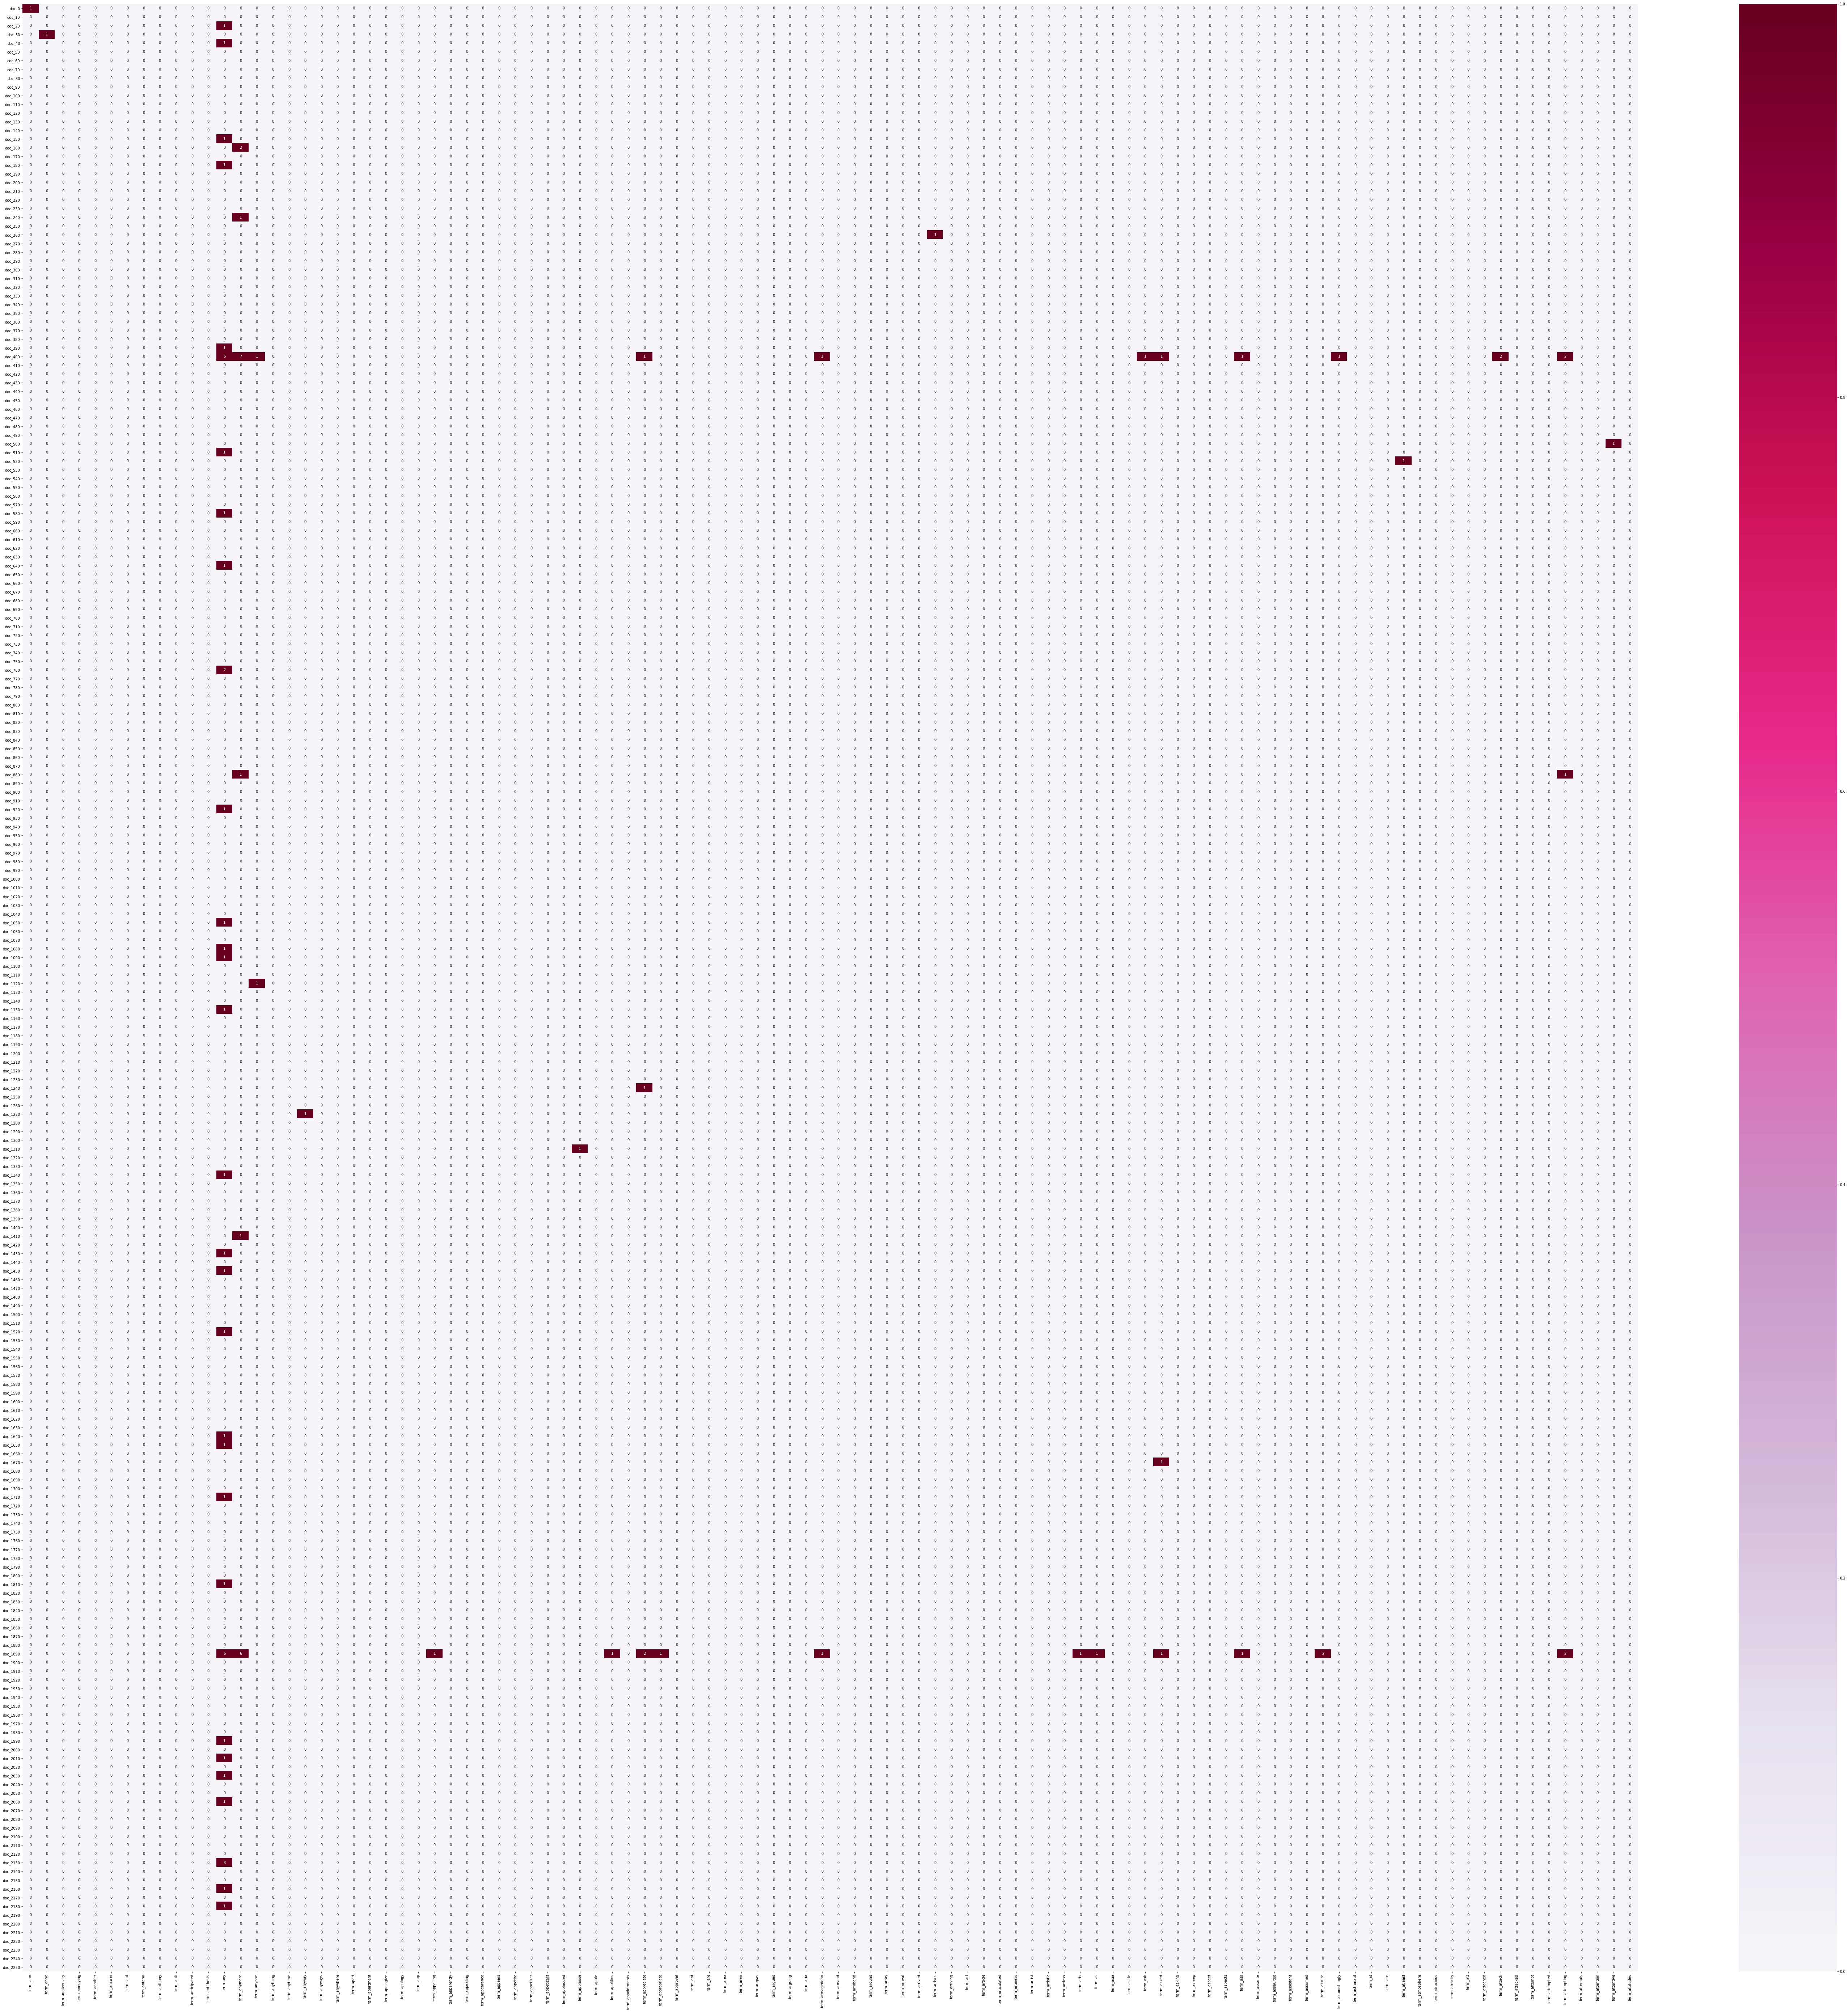

In [167]:
# Answer here
plot_x_sample = ["term_"+str(i) for i in count_vect.get_feature_names()[230:330]]
plot_y_sample = ["doc_"+ str(i) for i in list(X.index)[0::10]]
plot_z_sample = X_counts[0::10, 230:330].toarray()

df_todraw = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
plt.subplots(figsize=(100, 100))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [168]:
# 減少資料規模
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
from sklearn.decomposition import PCA

In [171]:
A_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [172]:
A_reduced.shape

(2257, 2)

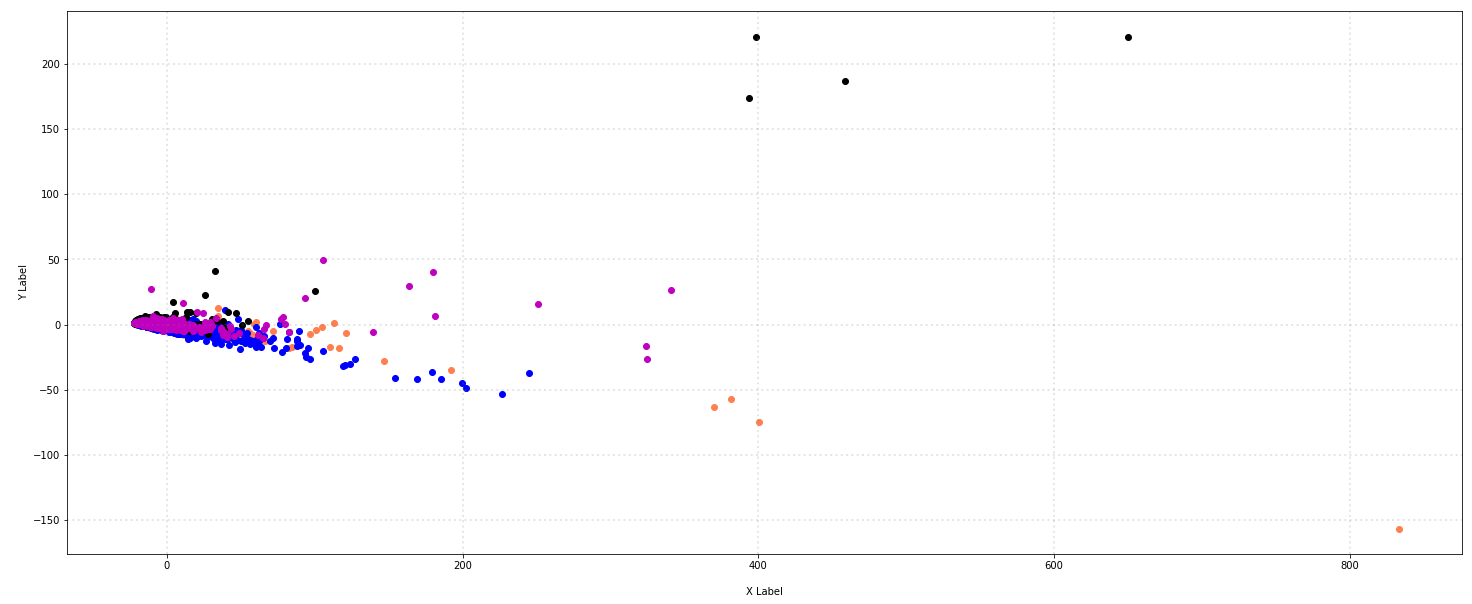

In [173]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = A_reduced[X['category_name'] == category].T[0]
    ys = A_reduced[X['category_name'] == category].T[1]
   #
# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [180]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [181]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [182]:
term_frequencies[0]

134

In [183]:
# Answer here
import helpers.text_analysis as ta
import plotly as py
py.tools.set_credentials_file(username='tonyyenyen', api_key='uf0t5SdbsgxBbiganTFo')
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\USER\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [184]:
# Answer here

term_frequencies_list = term_frequencies.tolist()


ntlist = list()
for i in range(len(term_frequencies_list)):
    if (term_frequencies_list[i]) > 1000:
            ntlist.append(term_frequencies_list[i])
            
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(),ntlist], "Sepcific Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [185]:
# Answer here
# finding by log
# Answer here
term_frequencies[::-1].sort()
term_frequencies_list = term_frequencies.tolist()
ntlist = list()
for i in range(len(term_frequencies_list)):
    if (term_frequencies_list[i]) > 1000:
            ntlist.append(term_frequencies_list[i])         
py.plotly.iplot(helps.plot_word_frequency([count_vect.get_feature_names(),ntlist], "Sepcific Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




PART2

In [191]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [192]:
# library & dataset
from matplotlib import pyplot as plt
import numpy as np
# Data
import seaborn as sns
# We use the specie column to choose the color. We need to make a numerical vector from it:

In [207]:
print('baoka in the forward coding')

baoka in the forward coding


part3 TF-IDF

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [198]:
vectorzier = TfidfVectorizer()
A_counts = vectorizer.fit_transform(A['sentance'])

In [203]:
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [202]:
len(vectorizer.get_feature_names())

5149

In [205]:
# Answer here
term_frequencies_list = term_frequencies.tolist()
ntlist = list()
for i in range(len(term_frequencies_list)):
    if (term_frequencies_list[i]) > 1000:
            ntlist.append(term_frequencies_list[i])         
py.plotly.iplot(ta.plot_word_frequency([count_vect.get_feature_names(),ntlist], "Sepcific Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




PART3.1 naive

PART4 


Actually this is my first time to use python, so I got a little bit hard to finish this homework. Thanks for some classmates, ta and online help. However I learned a lot from this lab course, and  some small trick online. 

1. ec = 'color' we can use ec to make a plot have extra screen which makes the graph more clear to see

2. %lsmagic can list out all of the instructions of % in notebook(similar to help?!

3. There are lots kind of graph found online, i.e Altair ,bokeh, mpld3


In [60]:
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

PART5

In [61]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [63]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [64]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [65]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [66]:
len(twenty_train.data)

2257

In [67]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


EX1

In [68]:
# Answer here
for t in twenty_train.target[:3]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian


In [69]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [70]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [71]:
#引用套件並縮寫為pd
import pandas as pd


# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [72]:
X[0:3]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...


In [73]:
# 加column的方法 add category to the dataframe
X['category'] = twenty_train.target

In [74]:
# add category label also
#lamba使用 max = lambda m, n: m if m > n else n
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [75]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [76]:
#跑句子 a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [77]:
#要抓到數10個
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [78]:
# loc用法 using loc (by position)
#df = df.loc[:, ['A', 'C']]
#df = df.iloc[:, [0, 2]]
X.iloc[::10, :][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


In [79]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [80]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


EX2

In [81]:
# Answer here
X.ix[::10,][:10]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


EX3

In [82]:
# Answer here
#找sci.med再category_name底下的
X[X['category_name']=='sci.med'].loc[::10, 'text'][0:5]

7      From: aldridge@netcom.com (Jacquelin Aldridge)...
49     From: jimj@contractor.EBay.Sun.COM (Jim Jones)...
82     From: jason@ab20.larc.nasa.gov (Jason Austin) ...
118    From: rogers@calamari.hi.com (Andrew Rogers) S...
142    From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...
Name: text, dtype: object

In [83]:
#找資料中有無 missing value
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [84]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [85]:
# Answer here
#apply(f, axis = 0) 將f函式應用到軸 0
X.isnull().apply(lambda X :dmh.check_missing_values(X), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [86]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [87]:
dummy_series

text        dummy_record
category               1
dtype: object

In [88]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [89]:
# check if the records was commited into result
len(result_with_series)

2258

In [90]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [91]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [92]:
X = X.append(dummy_dict, ignore_index=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:5186: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [93]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [94]:
#消除 missing value
X.dropna(inplace=True)

In [95]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

EX5

In [96]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [97]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [98]:
# Answer here
#字串''會被視為value, 而忽略''的則被視為 missing value, A是用numpy來設定nan
#B是空格, E是有特定函數的用法

In [99]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2227    False
2228    False
2229    False
2230    False
2231    False
2232    False
2233    False
2234    False
2235    False
2236    False
2237    False
2238    False
2239    False
2240    False
2241    False
2242    False
2243    False
2244    False
2245    False
2246    False
2247    False
2248    False
2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [100]:
sum(X.duplicated())

0

In [101]:
sum(X.duplicated('text'))

0

In [102]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [103]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [104]:
X.drop_duplicates(keep=False, inplace=True) 
# inplace applies changes directly on our dataframe

In [105]:
# Sampling
X_sample = X.sample(n=1000)  #random state

In [106]:
len(X_sample)

1000

In [107]:
X_sample[0:4]

,text,category,category_name
828,From: lunger@helix.enet.dec.com (Dave Lunger) ...,2,sci.med
169,From: cobb@alexia.lis.uiuc.edu (Mike Cobb) Sub...,0,alt.atheism
1417,From: jayne@mmalt.guild.org (Jayne Kulikauskas...,3,soc.religion.christian
2112,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med


In [108]:
# Answer here
print ('The big dataframe wont change. If running the equation X_sample[0:4] again,\n I will get different things compare with the privious one. \n The sampling 取樣 is randomly pick values from dataset.')

The big dataframe wont change. If running the equation X_sample[0:4] again,
 I will get different things compare with the privious one. 
 The sampling 取樣 is randomly pick values from dataset.


In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


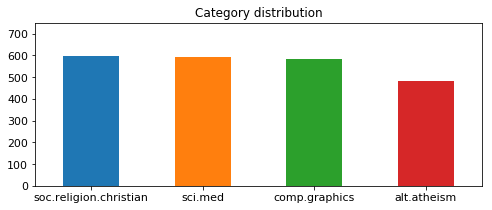

In [111]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 750],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# bar-條狀圖, fontsize-文字大小

sci.med                   259
comp.graphics             257
soc.religion.christian    256
alt.atheism               228
Name: category_name, dtype: int64


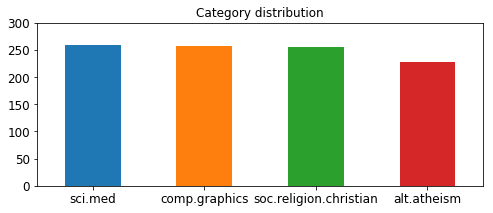

In [112]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

EX7

sci.med                   259
comp.graphics             257
soc.religion.christian    256
alt.atheism               228
Name: category_name, dtype: int64


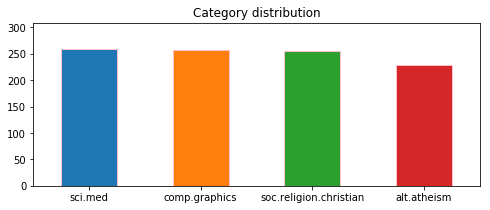

In [113]:
# Answer here
upperbond = max(X_sample.category_name.value_counts())+50
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,upperbond],       
                                    ec = 'pink',#描邊
                                    rot = 0, fontsize = 10, figsize = (8,3))

EX8

In [114]:
x1 = X.category_name.value_counts()
x1

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
sci.med                   259
comp.graphics             257
soc.religion.christian    256
alt.atheism               228
Name: category_name, dtype: int64


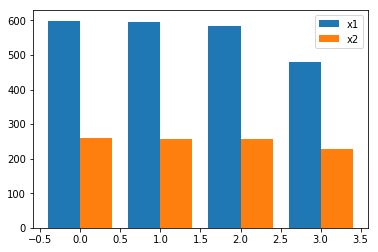

In [115]:
# Answer here
size = 4
x = np.arange(size)
x1 = X.category_name.value_counts()
x2 = X_sample.category_name.value_counts()
upperbond = max(x1)+50
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

total_width, n=0.8,2       # the width of the bars
width = total_width/n

x = x - (total_width - width) / 2
 
plt.bar(x, x1, width=width, label='x1')
plt.bar(x + width, x2, width=width, label='x2')
plt.legend()
plt.show()


# plot barchart for X_sample
#堆疊 plt.bar(x, x1, width=width, label='x1',fc = 'y')  
#for i in range(len(x)):  
#    x[i] = x[i] + width  
#plt.bar(x, x2, width=width, label='x2',tick_label = x2,fc = 'r')  
#plt.legend()  
#plt.show()  

In [116]:
import nltk
#第一次用nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [118]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [119]:
# 把文字轉成矩陣
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [120]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [121]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [122]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

EX10

In [124]:
# Answer here
X_countslist = X_counts[4:5,:].toarray()[0].tolist()
for i in  range(len(X_countslist)):
    if X_countslist[i] == 1:
        print ("index : {0}\tvocabulary: {1}".format(i,count_vect.get_feature_names()[i]))
print ("\ntotal : ",X_countslist.count(1))

index : 0	vocabulary: 00
index : 37	vocabulary: 01
index : 587	vocabulary: 14
index : 677	vocabulary: 15
index : 1490	vocabulary: 22
index : 1540	vocabulary: 22824
index : 1742	vocabulary: 28246
index : 2203	vocabulary: 41
index : 2521	vocabulary: 57
index : 4852	vocabulary: am
index : 5698	vocabulary: at
index : 5777	vocabulary: attend
index : 6430	vocabulary: believe
index : 7280	vocabulary: brother
index : 8197	vocabulary: certain
index : 8525	vocabulary: chose
index : 8544	vocabulary: christ
index : 9066	vocabulary: columbia
index : 9067	vocabulary: columbiasc
index : 9925	vocabulary: corp
index : 10481	vocabulary: customary
index : 10874	vocabulary: decision
index : 11498	vocabulary: died
index : 12731	vocabulary: elder
index : 13239	vocabulary: equalivant
index : 14095	vocabulary: fc
index : 14309	vocabulary: find
index : 14526	vocabulary: fnal
index : 14887	vocabulary: from
index : 15406	vocabulary: given
index : 15511	vocabulary: go
index : 15612	vocabulary: gov
index : 15822	v

In [125]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [126]:
# 00擺在哪句首都會出現 1
count_vect.transform([' Something 00 completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [128]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [129]:
plot_z = X_counts[0:20, 0:20].toarray()

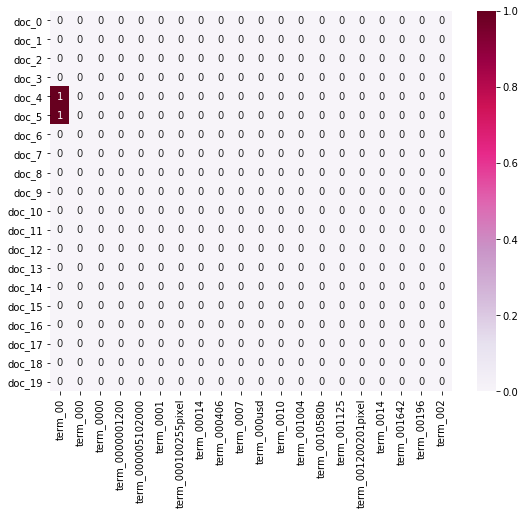

In [134]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

EX11

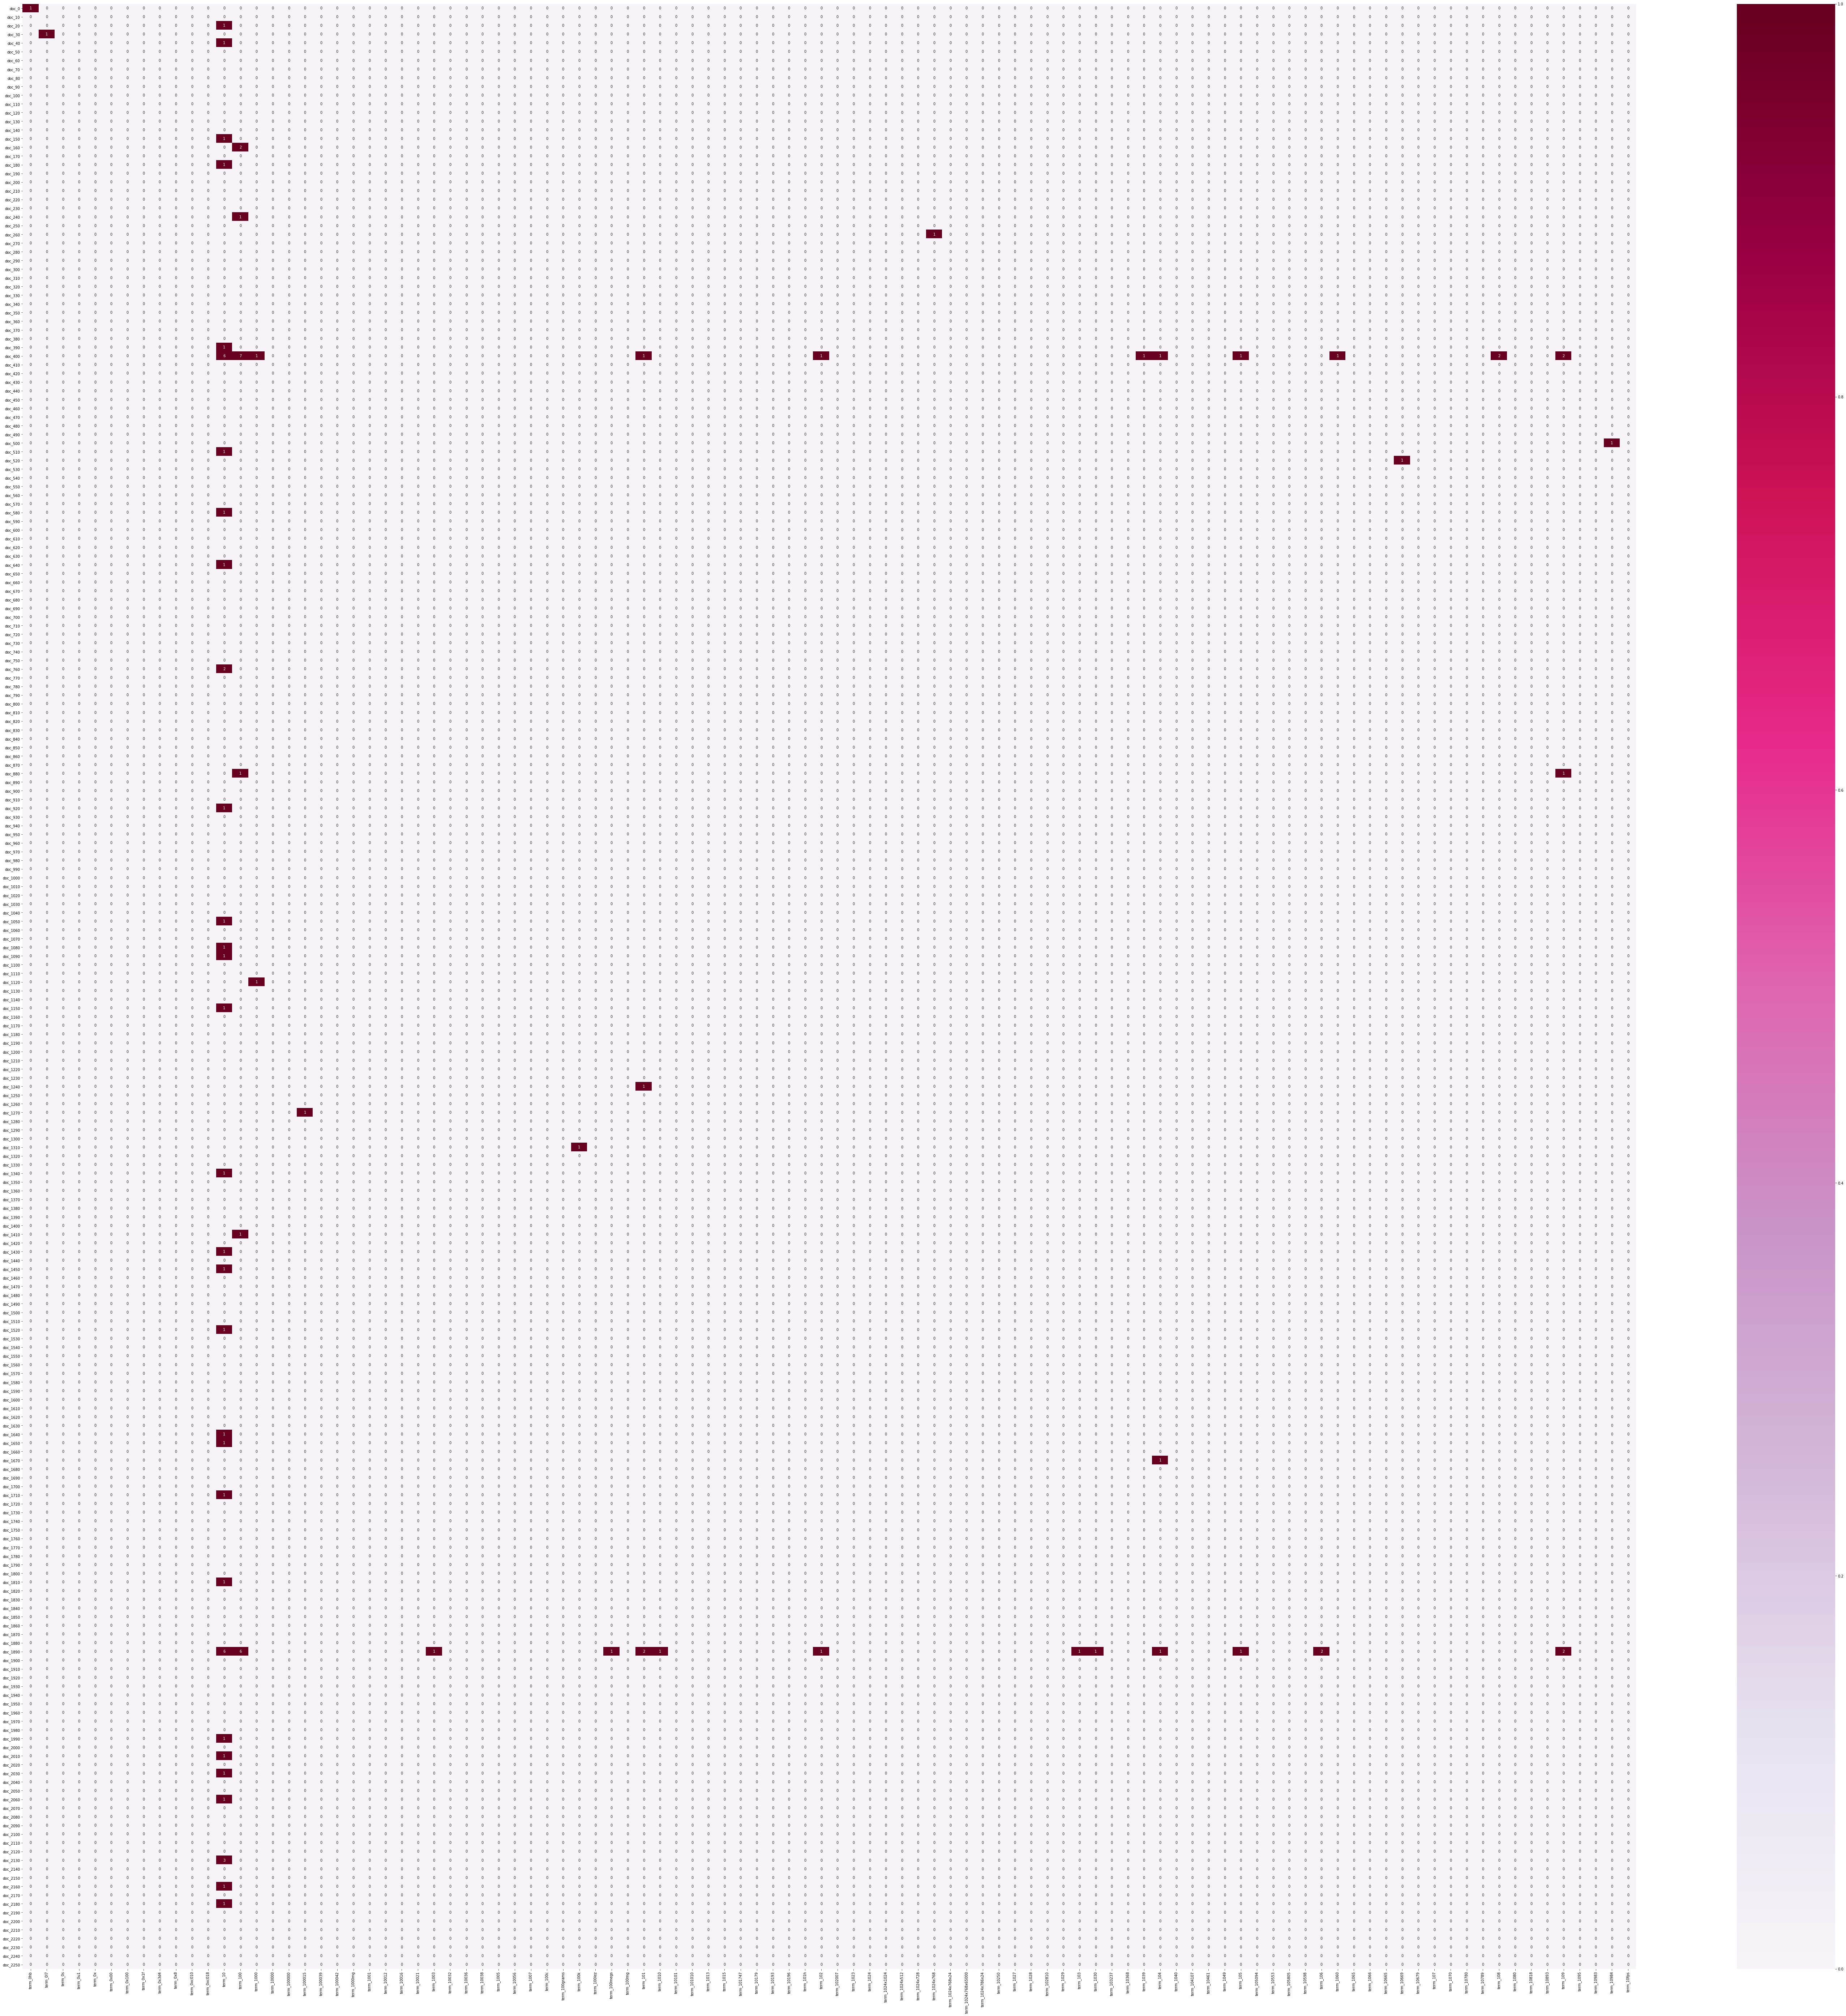

In [135]:
# Answer here
plot_x_sample = ["term_"+str(i) for i in count_vect.get_feature_names()[230:330]]
plot_y_sample = ["doc_"+ str(i) for i in list(X.index)[0::10]]
plot_z_sample = X_counts[0::10, 230:330].toarray()

df_todraw = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
plt.subplots(figsize=(100, 100))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [136]:
# 減少資料規模
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
from sklearn.decomposition import PCA

In [137]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

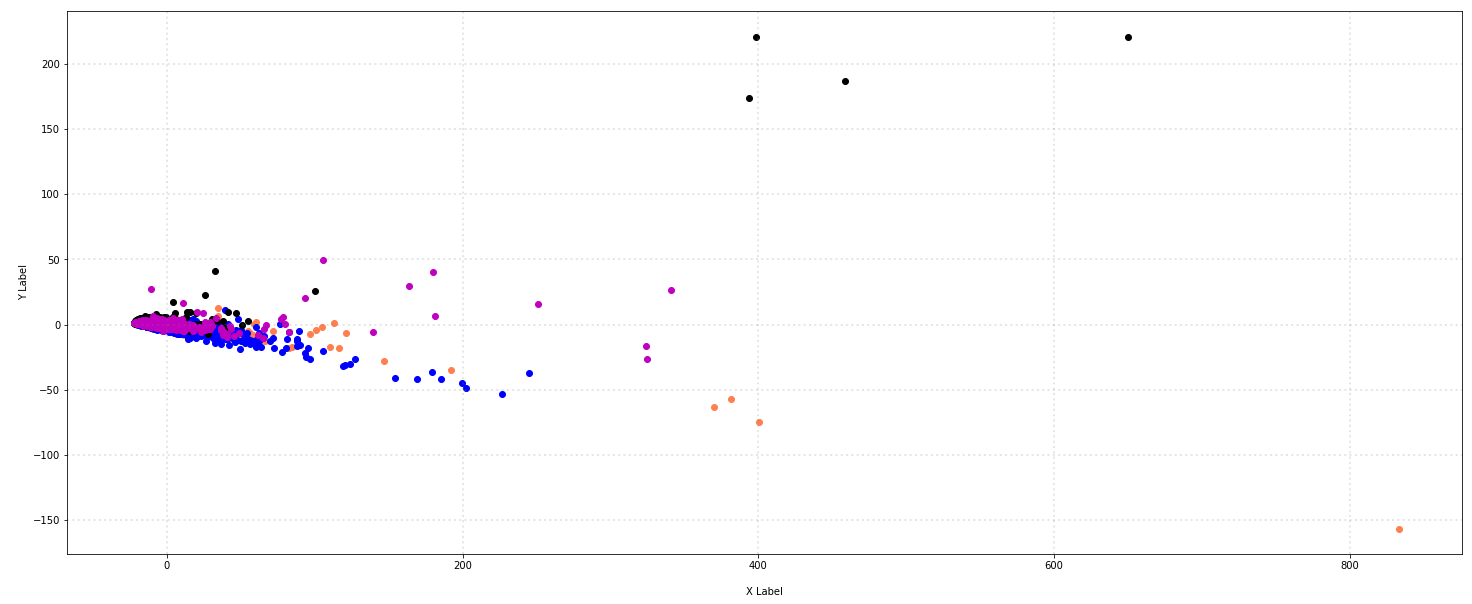

In [138]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   #
# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [190]:
#bokeh 
from bokeh.plotting import figure, output_file, show
# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

xs = X_reduced[X['category_name'] == category].T[0]
ys = X_reduced[X['category_name'] == category].T[1]
# add a line renderer with legend and line thickness
p.line(xs, ys, legend="Temp.", line_width=2)

# show the results
show(p)

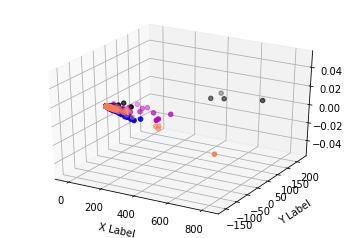

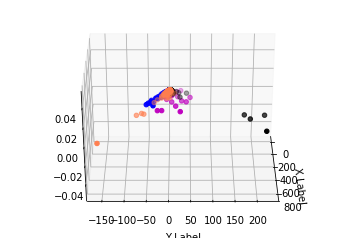

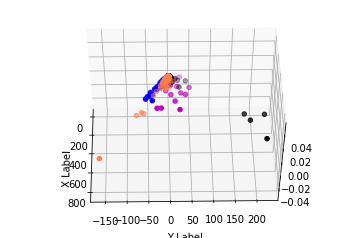

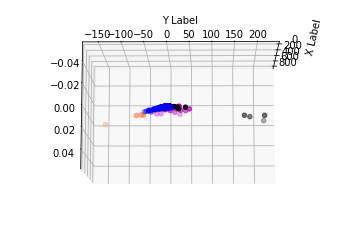

In [140]:
# Answer here
col = ['coral', 'blue', 'black', 'm']

# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   #
# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')


# Answer here
col = ['coral', 'blue', 'black', 'm']

# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
#rotate
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
#picture 3
# Answer here
col = ['coral', 'blue', 'black', 'm']

# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   #
# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(50, angle)

#picture 3
# Answer here
col = ['coral', 'blue', 'black', 'm']

# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   #
# scatter 散點圖
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(170, angle)


In [141]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [142]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [143]:
term_frequencies[0]

134

EX13

In [144]:
# Answer here
import helpers.text_analysis as helps
import plotly as py
py.tools.set_credentials_file(username='tonyyenyen', api_key='uf0t5SdbsgxBbiganTFo')
py.plotly.iplot(helps.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\USER\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



EX14

In [147]:
# Answer here

term_frequencies_list = term_frequencies.tolist()
ntlist = list()
for i in range(len(term_frequencies_list)):
    if (term_frequencies_list[i]) > 1000:
            ntlist.append(term_frequencies_list[i])         
py.plotly.iplot(helps.plot_word_frequency([count_vect.get_feature_names(),ntlist], "Sepcific Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\USER\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



EX15 long tail

In [150]:
# finding by log
# Answer here
term_frequencies[::-1].sort()
term_frequencies_list = term_frequencies.tolist()
ntlist = list()
for i in range(len(term_frequencies_list)):
    if (term_frequencies_list[i]) > 1000:
            ntlist.append(term_frequencies_list[i])         
py.plotly.iplot(helps.plot_word_frequency([count_vect.get_feature_names(),ntlist], "Sepcific Term Frequency Distribution"))

C:\Users\USER\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\USER\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



EX16

In [155]:
print('NO.If we generate the binarization using the category_name instead it wont work.The binarization only match the numerical data, and category_data is string.')

NO.If we generate the binarization using the category_name instead it wont work.The binarization only match the numerical data, and category_data is string.
